In [1]:
import matplotlib as mpl
import matplotlib.font_manager as fm

In [50]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import matplotlib as mpl
import matplotlib.font_manager as fm

In [3]:
print('버전', mpl.__version__)
print('설치 위치', mpl.__file__)
print('설정 위치', mpl.get_configdir())
print('캐쉬 위치', mpl.get_cachedir())

print('설정파일 위치', mpl.matplotlib_fname())

font_list = fm.findSystemFonts(fontpaths=None, fontext='ttf')
print(len(font_list)) 

버전 3.4.3
설치 위치 E:\ProgramData\lib\site-packages\matplotlib\__init__.py
설정 위치 C:\Users\dalwoo\.matplotlib
캐쉬 위치 C:\Users\dalwoo\.matplotlib
설정파일 위치 E:\ProgramData\lib\site-packages\matplotlib\mpl-data\matplotlibrc
747


In [4]:
plt.rc("font", family="Malgun Gothic")

### 연구비 수혜실적 

In [5]:
data = pd.read_excel('E:/학습/학부연구생/교수님알바/Data/연구비 수혜 실적.xlsx')
data.drop('전임교원 1인당 연구비',axis=1,inplace=True)
data

,설립구분,지역,학교,학과,2018,2019,2020
0,사립,수도권,고려대학교,건축사회환경공학부,547784.3,729058.7,1398755.6
1,사립,수도권,고려대학교,기계공학부,637933.5,621486.1,798132.3
2,사립,수도권,고려대학교,산업경영공학부,230314.1,335729.9,527501.6
3,사립,수도권,고려대학교,전기전자공학부,570756.2,546516.1,648780.0
4,사립,수도권,고려대학교,화공생명공학과,720031.6,1045297.4,1130027.6
...,...,...,...,...,...,...,...
115,사립,수도권,홍익대학교,기계ㆍ시스템디자인공학과,139950.2,203037.3,239277.4
116,사립,수도권,홍익대학교,신소재·화공시스템공학부 화학공학전공,124839.4,104200.9,109886.3
117,사립,수도권,홍익대학교,전자·전기공학부,119006.3,139110.7,144701.8
118,사립,수도권,홍익대학교,컴퓨터・데이터공학부 산업・데이터공학전공,169395.8,124361.7,113575.6


In [6]:
def f(i):
  if ('산업' in i) or ('품질' in i) or ('빅데이터' in i):
    return '산업공학과'
  elif '기계' in i:
    return '기계공학과'
  elif ('화학' in i) or ('화공' in i):
    return '화학공학과'
  elif '컴퓨터' in i:
    return '컴퓨터공학과'
  elif ('전자' in i) or ('전기' in i):
    return '전자전기공학과'
  else:
    return '기타'

data['학과분류'] = data['학과'].apply(lambda x: f(x))
data

,설립구분,지역,학교,학과,2018,2019,2020,학과분류
0,사립,수도권,고려대학교,건축사회환경공학부,547784.3,729058.7,1398755.6,기타
1,사립,수도권,고려대학교,기계공학부,637933.5,621486.1,798132.3,기계공학과
2,사립,수도권,고려대학교,산업경영공학부,230314.1,335729.9,527501.6,산업공학과
3,사립,수도권,고려대학교,전기전자공학부,570756.2,546516.1,648780.0,전자전기공학과
4,사립,수도권,고려대학교,화공생명공학과,720031.6,1045297.4,1130027.6,화학공학과
...,...,...,...,...,...,...,...,...
115,사립,수도권,홍익대학교,기계ㆍ시스템디자인공학과,139950.2,203037.3,239277.4,기계공학과
116,사립,수도권,홍익대학교,신소재·화공시스템공학부 화학공학전공,124839.4,104200.9,109886.3,화학공학과
117,사립,수도권,홍익대학교,전자·전기공학부,119006.3,139110.7,144701.8,전자전기공학과
118,사립,수도권,홍익대학교,컴퓨터・데이터공학부 산업・데이터공학전공,169395.8,124361.7,113575.6,산업공학과


In [7]:
data.groupby('설립구분')[[2018,2019,2020]].mean()

data.groupby('학과분류')[[2018,2019,2020]].mean()

data.groupby(['설립구분','학과분류'])[[2018,2019,2020]].mean()

data.groupby('학교')[[2018,2019,2020]].mean()

data.groupby(['지역','학교'])[[2018,2019,2020]].mean()

data.groupby(['학교','학과분류'])[[2018,2019,2020]].mean()

2018       2019       2020
학교    학과분류                                   
고려대학교 기계공학과    637933.5   621486.1   798132.3
      기타       547784.3   729058.7  1398755.6
      산업공학과    230314.1   335729.9   527501.6
      전자전기공학과  570756.2   546516.1   648780.0
      화학공학과    720031.6  1045297.4  1130027.6
...                 ...        ...        ...
홍익대학교 기계공학과    139950.2   203037.3   239277.4
      산업공학과    169395.8   124361.7   113575.6
      전자전기공학과  119006.3   139110.7   144701.8
      컴퓨터공학과    53315.3    78447.9    72049.3
      화학공학과    124839.4   104200.9   109886.3

[119 rows x 3 columns]

### 시각화 

> 지도 시각화 

In [8]:
pip install folium

Note: you may need to restart the kernel to use updated packages.


In [9]:
import folium

In [10]:
주소 = pd.read_excel('E:/학습/학부연구생/교수님알바/시각화참고/2019년+10월+1일+기준+고등교육기관+주소록(24개대학).xlsx',sheet_name='Sheet2')
주소_df = 주소[((주소['학교종류']=='대학교')|(주소['학교종류']=='산업대학'))&(주소['학교상태']!='폐교')] # 한국교통대학은 없음(안보임)
주소_df.head()

,연도,학교종류,시도,학교명,본분교,학교상태,설립,우편번호,주소,위도,경도
0,2019,대학교,충남,공주대학교,본교,기존,국립,32588,"충청남도 공주시 공주대학로 56 (신관동, 공주대학교)",127.140927,36.469179
9,2019,대학교,경북,금오공과대학교,본교,기존,국립,39177,"경상북도 구미시 대학로 61 (양호동, 금오공과대학교)",128.392346,36.145920
14,2019,대학교,부산,부산대학교,본교,기존,국립,46241,"부산광역시 금정구 부산대학로63번길 2 (장전동, 부산대학교)",129.082025,35.232579
29,2019,대학교,서울,서울대학교,본교,기존,국립대법인,8826,"서울특별시 관악구 관악로 1 (신림동, 서울대학교)",126.952667,37.458903
42,2019,대학교,광주,전남대학교,본교,기존,국립,61186,"광주광역시 북구 용봉로 77 (용봉동, 전남대학교)",126.908812,35.177702


In [11]:
def color_select(row):
    설립구분 = row.설립
    if '국립' in 설립구분:
        return 'darkviolet'
    else:
        return 'red'

In [116]:
from folium import Marker
from folium import Circle
import json

df = 주소_df[['학교명','설립','위도','경도']]

# 지도 만들기
seoul_map = folium.Map(location=[36.58, 127.40], tiles='openstreetmap',
               control_scale=True, zoom_start=11)

# Add  points to the map
for _, row in df.iterrows():
    Circle(location = [row['경도'],row['위도']],
           radius = 1000,
           popup=row['학교명'],
           color = color_select(row) # 국립학교면 보라빛에 가까운 동그라미
    ).add_to(seoul_map)
    

with open('E:/C드라이브/새다운로드/TL_SCCO_CTPRVN.json',mode='rt',encoding='utf-8') as f:
    geo = json.loads(f.read())
    f.close()

folium.GeoJson(
    geo,
    name='seoul_municipalities'
).add_to(seoul_map)

seoul_map

# for name, lat, lng in zip(df.학교명, df.위도, df.경도):
#     folium.CircleMarker([lng, lat],
#                         radius=20,  # 원의 반지름
#                         fill=True,
#                         color="#34ebc6", # 원의 둘레 색상
#                         fill_color="#c634eb",
#                         popup=name
#                         ).add_to(seoul_map)

> 전임교원 1인당 연구비 수혜실적 

In [15]:
산공수혜실적_2018 = data.groupby(['학교','학과분류'])[[2018]].mean().unstack()[2018].loc[:,'산업공학과'] # 산업공학
산공수혜실적_2018

학교
고려대학교        230314.1
공주대학교         35033.3
금오공과대학교       36609.7
남서울대학교        50080.0
명지대학교         26242.7
부산대학교        148916.1
서울과학기술대학교    126949.6
서울대학교        270500.4
순천향대학교       224935.0
연세대학교        473515.4
울산대학교        146177.9
인천대학교         67763.1
전남대학교         71688.9
전북대학교        182915.3
전주대학교         49964.3
조선대학교         64500.0
포항공과대학교      348497.3
한국과학기술원      424001.5
한국교통대학교       20245.1
한국기술교육대학교    810511.7
한남대학교         33000.0
한밭대학교         38824.8
한양대학교        378144.6
홍익대학교        169395.8
Name: 산업공학과, dtype: float64

In [16]:
산공외수혜실적_2018 = data.groupby(['학교','학과분류'])[[2018]].mean().unstack()[2018].iloc[:,[0,1,3,4,5]].mean(axis=1) # 산업공학 외
산공외수혜실적_2018

학교
고려대학교        6.191264e+05
공주대학교        5.904782e+04
금오공과대학교      9.926790e+04
남서울대학교       4.455462e+04
명지대학교        5.745095e+04
부산대학교        2.715179e+05
서울과학기술대학교    1.195937e+05
서울대학교        6.507043e+05
순천향대학교       3.668880e+04
연세대학교        8.446924e+05
울산대학교        8.918105e+04
인천대학교        9.411033e+04
전남대학교        3.559558e+05
전북대학교        3.139008e+05
전주대학교        4.753068e+04
조선대학교        1.762962e+05
포항공과대학교      7.559522e+05
한국과학기술원      1.216076e+06
한국교통대학교      2.483650e+05
한국기술교육대학교    2.069295e+05
한남대학교        4.537055e+04
한밭대학교        6.625052e+04
한양대학교        5.613617e+05
홍익대학교        1.092778e+05
dtype: float64

In [17]:
산공수혜실적_2018.index.unique()

Index(['고려대학교', '공주대학교', '금오공과대학교', '남서울대학교', '명지대학교', '부산대학교', '서울과학기술대학교',
       '서울대학교', '순천향대학교', '연세대학교', '울산대학교', '인천대학교', '전남대학교', '전북대학교', '전주대학교',
       '조선대학교', '포항공과대학교', '한국과학기술원', '한국교통대학교', '한국기술교육대학교', '한남대학교', '한밭대학교',
       '한양대학교', '홍익대학교'],
      dtype='object', name='학교')

### 산공vs산공외

In [28]:
def 산공vs산공외비교시각화(산공,산공외): # 학교별, 산공vs산공외 
    학교목록 = []
    학산 = []
    학산외 = []
    
    for 학교 in 산공.index.unique():
        학교산공 = 산공.map(lambda x: round(x,3)).loc[학교]
        학교산공외 = 산공외.map(lambda x: round(x,3)).loc[학교]
        print(학교,'산공: ',학교산공,'\n','산공외 평균: ',학교산공외)
        학교목록.append(학교)
        학산.append(학교산공)
        학산외.append(학교산공외)

    plt.figure(figsize=(32,16))
    plt.plot(pd.Series(학산,학교목록),label='산공',color='deeppink')
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=14)
    for i, v in enumerate(pd.Series(학산,학교목록).index):
        plt.text(v, pd.Series(학산,학교목록).values[i], pd.Series(학산,학교목록).values[i],                 # 좌표 (x축 = v, y축 = y[0]..y[1], 표시 = y[0]..y[1])
                 fontsize = 9, 
                 color='blue',
                 horizontalalignment='center',  # horizontalalignment (left, center, right)
                 verticalalignment='bottom')    # verticalalignment (top, center, bottom)
    plt.plot(pd.Series(학산외,학교목록),label='산공 외',color='cyan')
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=14)
    for i, v in enumerate(pd.Series(학산외,학교목록).index):
        plt.text(v, pd.Series(학산외,학교목록).values[i], pd.Series(학산외,학교목록).values[i],                 # 좌표 (x축 = v, y축 = y[0]..y[1], 표시 = y[0]..y[1])
                 fontsize = 9, 
                 color='blue',
                 horizontalalignment='center',  # horizontalalignment (left, center, right)
                 verticalalignment='bottom')    # verticalalignment (top, center, bottom)
    plt.legend(loc='upper left',ncol=2,prop={'size': 16})

In [26]:
산공수혜실적_2019 = data.groupby(['학교','학과분류'])[[2019]].mean().unstack()[2019].loc[:,'산업공학과'] # 산업공학
산공수혜실적_2020 = data.groupby(['학교','학과분류'])[[2020]].mean().unstack()[2020].loc[:,'산업공학과'] # 산업공학
산공외수혜실적_2019 = data.groupby(['학교','학과분류'])[[2019]].mean().unstack()[2019].iloc[:,[0,1,3,4,5]].mean(axis=1) # 산업공학 외
산공외수혜실적_2020 = data.groupby(['학교','학과분류'])[[2020]].mean().unstack()[2020].iloc[:,[0,1,3,4,5]].mean(axis=1) # 산업공학 외

고려대학교 산공:  230314.1 
 산공외 평균:  619126.4
공주대학교 산공:  35033.3 
 산공외 평균:  59047.825
금오공과대학교 산공:  36609.7 
 산공외 평균:  99267.9
남서울대학교 산공:  50080.0 
 산공외 평균:  44554.617
명지대학교 산공:  26242.7 
 산공외 평균:  57450.95
부산대학교 산공:  148916.1 
 산공외 평균:  271517.925
서울과학기술대학교 산공:  126949.6 
 산공외 평균:  119593.725
서울대학교 산공:  270500.4 
 산공외 평균:  650704.275
순천향대학교 산공:  224935.0 
 산공외 평균:  36688.8
연세대학교 산공:  473515.4 
 산공외 평균:  844692.45
울산대학교 산공:  146177.9 
 산공외 평균:  89181.05
인천대학교 산공:  67763.1 
 산공외 평균:  94110.325
전남대학교 산공:  71688.9 
 산공외 평균:  355955.75
전북대학교 산공:  182915.3 
 산공외 평균:  313900.775
전주대학교 산공:  49964.3 
 산공외 평균:  47530.675
조선대학교 산공:  64500.0 
 산공외 평균:  176296.2
포항공과대학교 산공:  348497.3 
 산공외 평균:  755952.225
한국과학기술원 산공:  424001.5 
 산공외 평균:  1216075.675
한국교통대학교 산공:  20245.1 
 산공외 평균:  248364.975
한국기술교육대학교 산공:  810511.7 
 산공외 평균:  206929.475
한남대학교 산공:  33000.0 
 산공외 평균:  45370.55
한밭대학교 산공:  38824.8 
 산공외 평균:  66250.525
한양대학교 산공:  378144.6 
 산공외 평균:  561361.675
홍익대학교 산공:  169395.8 
 산공외 평균:  109277.8


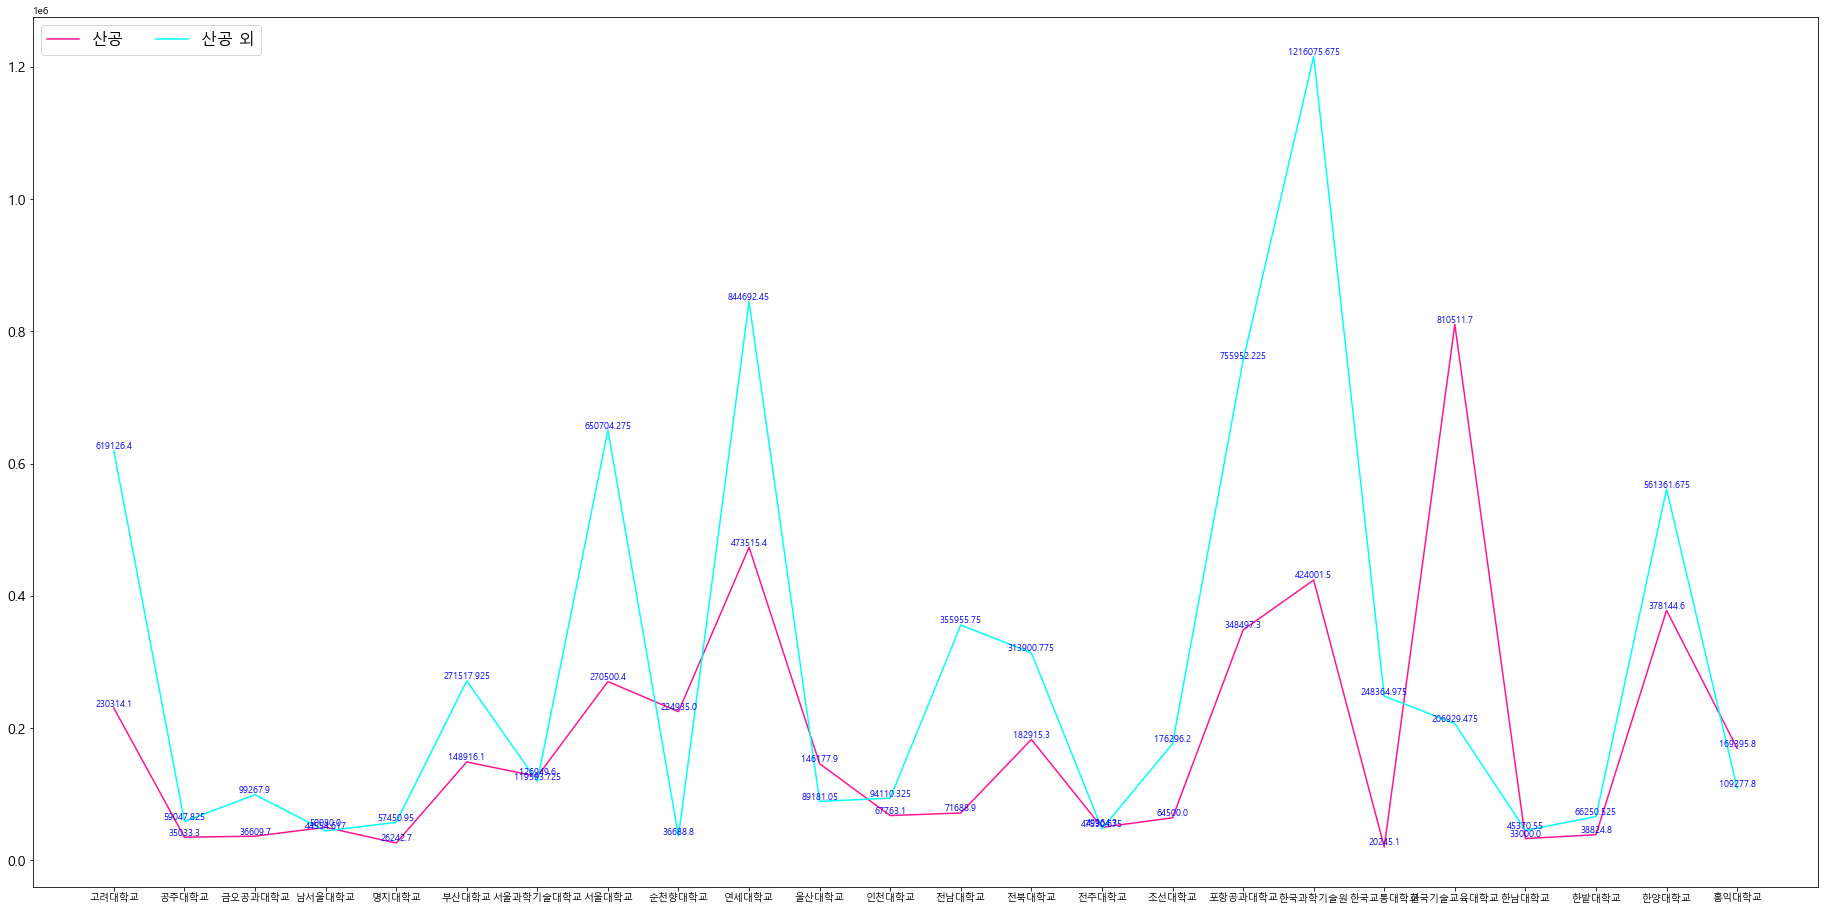

In [29]:
산공vs산공외비교시각화(산공수혜실적_2018,산공외수혜실적_2018)

고려대학교 산공:  335729.9 
 산공외 평균:  735589.575
공주대학교 산공:  20666.7 
 산공외 평균:  81462.825
금오공과대학교 산공:  56808.5 
 산공외 평균:  83061.7
남서울대학교 산공:  30940.4 
 산공외 평균:  39906.35
명지대학교 산공:  29153.9 
 산공외 평균:  122754.05
부산대학교 산공:  217960.9 
 산공외 평균:  189126.1
서울과학기술대학교 산공:  159373.4 
 산공외 평균:  108943.7
서울대학교 산공:  232457.5 
 산공외 평균:  853288.675
순천향대학교 산공:  102640.0 
 산공외 평균:  48073.475
연세대학교 산공:  276653.9 
 산공외 평균:  884036.7
울산대학교 산공:  159101.8 
 산공외 평균:  127388.75
인천대학교 산공:  79449.4 
 산공외 평균:  91967.4
전남대학교 산공:  76569.6 
 산공외 평균:  302165.1
전북대학교 산공:  156411.8 
 산공외 평균:  321152.325
전주대학교 산공:  48500.0 
 산공외 평균:  44498.425
조선대학교 산공:  161838.5 
 산공외 평균:  215632.25
포항공과대학교 산공:  370023.2 
 산공외 평균:  730458.075
한국과학기술원 산공:  641975.7 
 산공외 평균:  1245242.65
한국교통대학교 산공:  18787.2 
 산공외 평균:  142353.025
한국기술교육대학교 산공:  85665.9 
 산공외 평균:  299413.9
한남대학교 산공:  83384.8 
 산공외 평균:  43988.2
한밭대학교 산공:  54593.7 
 산공외 평균:  110855.025
한양대학교 산공:  170665.0 
 산공외 평균:  614555.35
홍익대학교 산공:  124361.7 
 산공외 평균:  131199.2


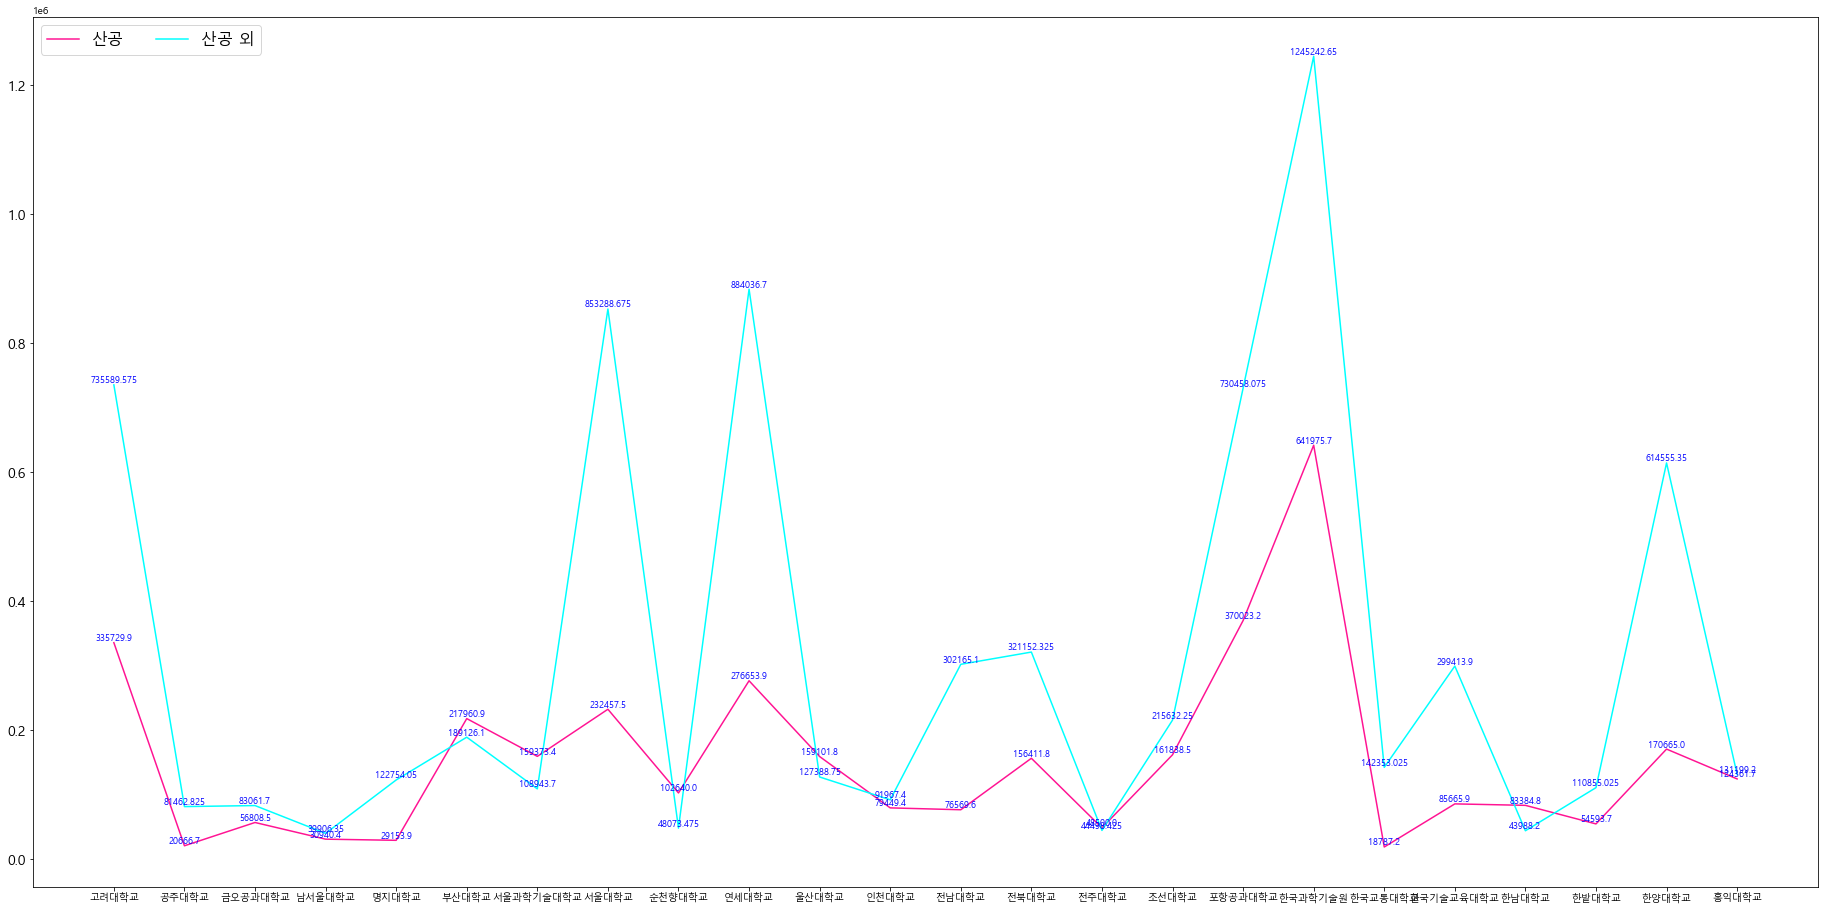

In [30]:
산공vs산공외비교시각화(산공수혜실적_2019,산공외수혜실적_2019)

고려대학교 산공:  527501.6 
 산공외 평균:  993923.875
공주대학교 산공:  34833.4 
 산공외 평균:  104141.3
금오공과대학교 산공:  69445.8 
 산공외 평균:  101014.475
남서울대학교 산공:  22212.0 
 산공외 평균:  40524.717
명지대학교 산공:  17860.0 
 산공외 평균:  109681.325
부산대학교 산공:  130872.4 
 산공외 평균:  385969.675
서울과학기술대학교 산공:  195034.4 
 산공외 평균:  145871.85
서울대학교 산공:  264616.2 
 산공외 평균:  846274.85
순천향대학교 산공:  156249.5 
 산공외 평균:  50207.475
연세대학교 산공:  426139.4 
 산공외 평균:  907586.725
울산대학교 산공:  19021.5 
 산공외 평균:  121927.0
인천대학교 산공:  94704.2 
 산공외 평균:  100109.25
전남대학교 산공:  128136.7 
 산공외 평균:  301193.5
전북대학교 산공:  27634.3 
 산공외 평균:  279418.675
전주대학교 산공:  42250.0 
 산공외 평균:  25901.9
조선대학교 산공:  179882.5 
 산공외 평균:  200874.8
포항공과대학교 산공:  435025.2 
 산공외 평균:  896236.125
한국과학기술원 산공:  541737.0 
 산공외 평균:  1309554.45
한국교통대학교 산공:  20216.6 
 산공외 평균:  159184.0
한국기술교육대학교 산공:  229593.6 
 산공외 평균:  239316.225
한남대학교 산공:  49950.0 
 산공외 평균:  54067.25
한밭대학교 산공:  290835.5 
 산공외 평균:  148318.975
한양대학교 산공:  94213.4 
 산공외 평균:  756942.25
홍익대학교 산공:  113575.6 
 산공외 평균:  141478.7


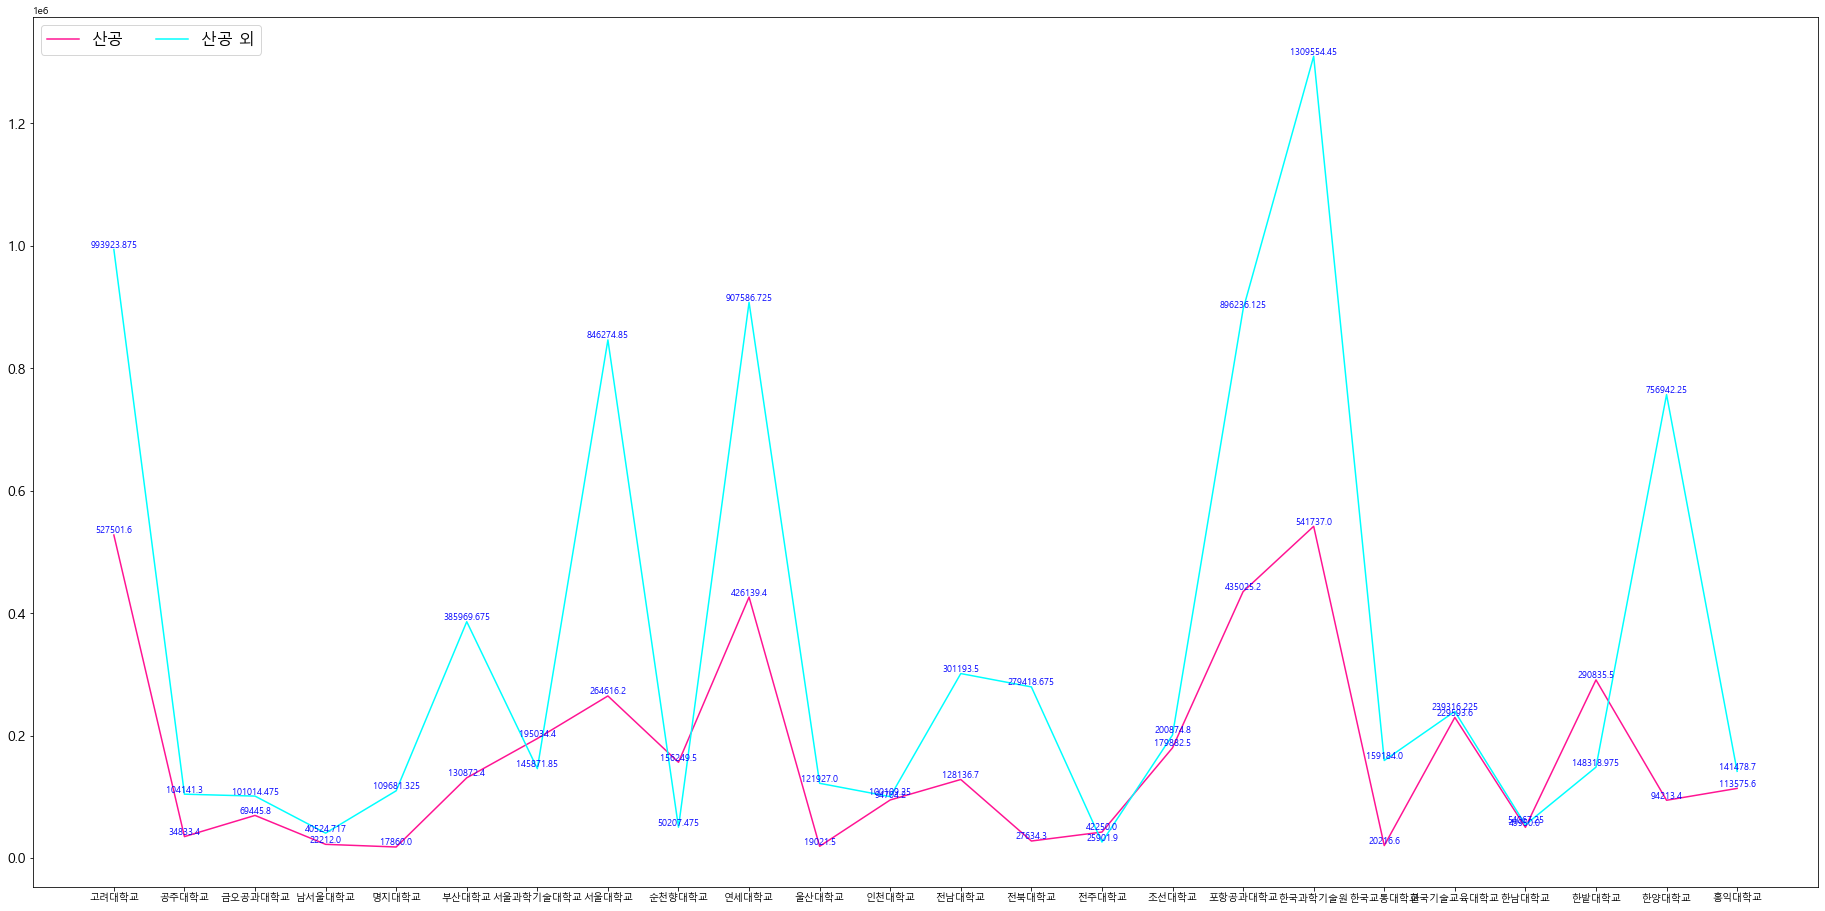

In [31]:
산공vs산공외비교시각화(산공수혜실적_2020,산공외수혜실적_2020)

### 설립유형(국공립vs사립)별 학과별

In [112]:
def 설립유형별_학과별subplot(년도,df):
    fig, ax = plt.subplots(ncols=2,figsize=(13,6))
    g = sns.barplot(x='학교', y = 년도, hue = '설립구분', data=df, ax=ax[0])
    g.set_xticklabels(g.get_xticklabels(), rotation=45,
                      horizontalalignment='right',
                      fontweight='light',
                      fontsize='x-small'
                     )
    g = sns.scatterplot(x= '학교', y = 년도,hue = '학과분류', size = '설립구분', sizes =(60,80),style = '설립구분',data = df, ax=ax[1])
    g.set_xticklabels(g.get_xticklabels(), rotation=45,
                      horizontalalignment='right',
                      fontweight='light',
                      fontsize='x-small'
                     )
    plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left',ncol=2,prop={'size': 12})

In [96]:
# index 재정렬 (국공립은 국공립끼리, 사립은 사립끼리 묶기 위함)

국공립주소 = data[data['설립구분']=='국공립'].index
사립주소 = data[data['설립구분']=='사립'].index
temp = list(국공립주소)
temp.extend(list(사립주소))
temp

[5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 105,
 106,
 107,
 108,
 109,
 0,
 1,
 2,
 3,
 4,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119]

In [107]:
data = data.loc[temp].reset_index().iloc[:,1:]
data

,설립구분,지역,학교,학과,2018,2019,2020,학과분류
0,국공립,중부권,공주대학교,기계자동차공학부,98413.0,101973.5,117295.5,기계공학과
1,국공립,중부권,공주대학교,산업시스템공학과,35033.3,20666.7,34833.4,산업공학과
2,국공립,중부권,공주대학교,전기전자제어공학부,35871.1,26722.0,14665.2,전자전기공학과
3,국공립,중부권,공주대학교,컴퓨터공학부,19943.0,17479.6,61545.9,컴퓨터공학과
4,국공립,중부권,공주대학교,화학공학부,81964.2,179676.2,223058.6,화학공학과
...,...,...,...,...,...,...,...,...
115,사립,수도권,홍익대학교,기계ㆍ시스템디자인공학과,139950.2,203037.3,239277.4,기계공학과
116,사립,수도권,홍익대학교,신소재·화공시스템공학부 화학공학전공,124839.4,104200.9,109886.3,화학공학과
117,사립,수도권,홍익대학교,전자·전기공학부,119006.3,139110.7,144701.8,전자전기공학과
118,사립,수도권,홍익대학교,컴퓨터・데이터공학부 산업・데이터공학전공,169395.8,124361.7,113575.6,산업공학과


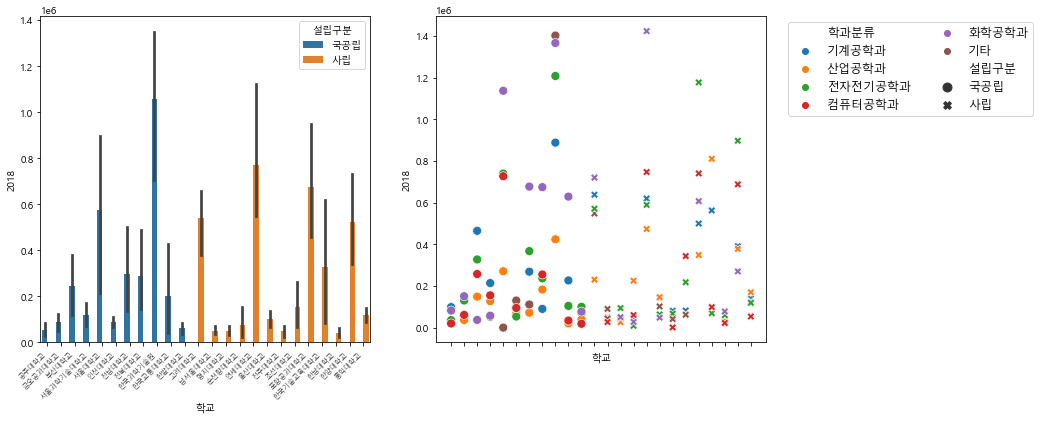

In [108]:
설립유형별_학과별subplot(2018,data)

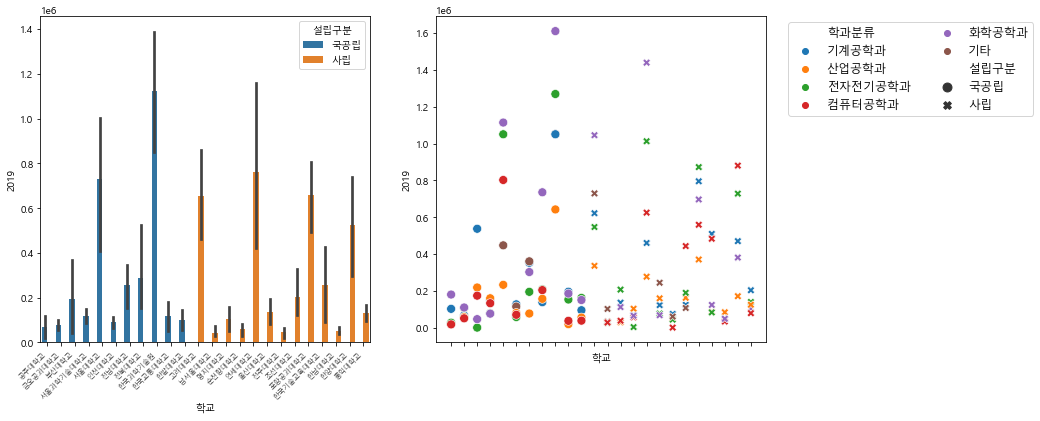

In [114]:
설립유형별_학과별subplot(2019,data)

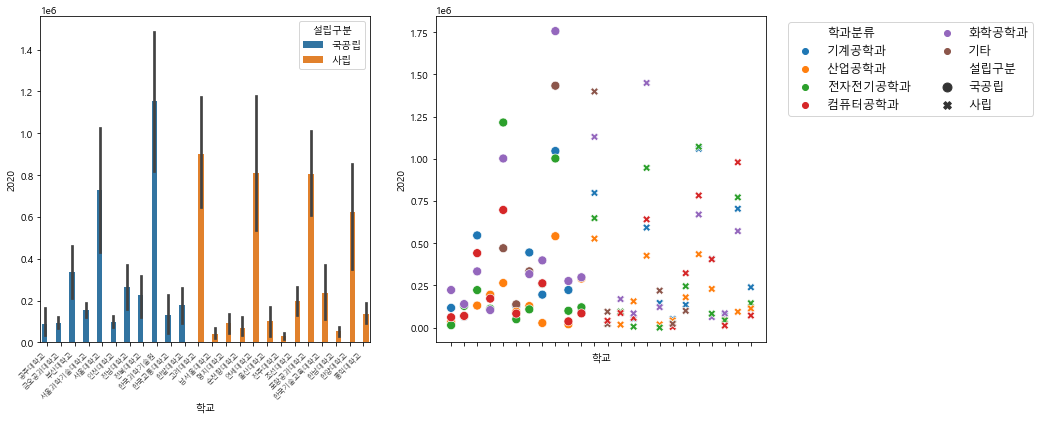

In [115]:
설립유형별_학과별subplot(2020,data)